# Sales Data analysis project

### Goal: The purpose of this project is to analyze sales data for the year 2019. After analyzing and visualizing the data, we intend to uncover insights which will help us in understanding the market better and make informed decisions for the future.

#### Research Questions:
#### 1. Which was the most profitable month and why? Was the quarter of the year also profitable?
#### 2. Which cities had the highest and lowest sales respectively?
#### 3. What are the most and least sold products?
#### 4. How does the price affect the purchase decisions of the buyers?
#### 5. What are the most profitable hours during the day? How to maximize sales during these hours?

In [1]:
import pandas as pd

In [2]:
# install openpyxl package if getting "XLRDError: Excel xlsx file; not supported" error
# pip install openpyxl

df = pd.read_excel(r"C:\Users\Amey\Music\Sales_data.xlsx", engine='openpyxl')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670.0,Wired Headphones,2.0,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671.0,Bose SoundSport Headphones,1.0,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672.0,iPhone,1.0,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673.0,AA Batteries (4-pack),2.0,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674.0,AA Batteries (4-pack),2.0,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [3]:
# check for duplicate values in the dataset

df.duplicated().sum()

1162

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,319666.0,Lightning Charging Cable,1.0,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667.0,AA Batteries (4-pack),2.0,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668.0,Vareebadd Phone,1.0,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669.0,Wired Headphones,1.0,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"
186849,319670.0,Bose SoundSport Headphones,1.0,99.99,12/21/19 21:45,"747 Chestnut St, Los Angeles, CA 90001"


In [6]:
# check for null values in the dataset

df.isna().sum()

Order ID            2
Product             1
Quantity Ordered    2
Price Each          2
Order Date          1
Purchase Address    1
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
# after dropping the duplicates and null values, the dataset is now free of reduntant and non-useful records

df.describe()

,Order ID,Quantity Ordered,Price Each
count,185686.000000,185686.000000,185686.000000
mean,230411.376227,1.124544,184.519255
std,51511.717183,0.443069,332.843838
min,141234.000000,1.000000,2.990000
25%,185833.250000,1.000000,11.950000
50%,230354.500000,1.000000,14.950000
75%,275028.750000,1.000000,150.000000
max,319670.000000,9.000000,1700.000000


In [9]:
df['Order Date']

0         08/31/19 22:21
1         08/15/19 15:11
2         08/06/19 14:40
3         08/29/19 20:59
4         08/15/19 19:53
               ...      
186845    12/11/19 20:58
186846    12/01/19 12:01
186847    12/09/19 06:43
186848    12/03/19 10:39
186849    12/21/19 21:45
Name: Order Date, Length: 185686, dtype: object

In [10]:
# changing the date format to get the year as 'yyyy' instead of 'yy'

df['Order Date'] = df['Order Date'].apply(pd.to_datetime)
df.head()

# import datetime

# df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')

# df['Order Date'] = df['Order Date'].apply(lambda x: pd.to_datetime(x).strftime('%m/%d/%Y %H:%M'))

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670.0,Wired Headphones,2.0,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671.0,Bose SoundSport Headphones,1.0,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001"
2,236672.0,iPhone,1.0,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035"
3,236673.0,AA Batteries (4-pack),2.0,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001"
4,236674.0,AA Batteries (4-pack),2.0,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001"


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  float64       
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  float64       
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 9.9+ MB


In [12]:
# order id is currently stored in the float format which is not ideal
# we will convert it to the string format because the order id can contain alphanumeric values

df['Order ID'] = df['Order ID'].astype(str).apply(lambda x: x.replace('.0',''))

In [13]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2.0,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1.0,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1.0,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2.0,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2.0,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001"


In [14]:
# after changing the date format, it is easier to extract month from the date

import datetime as dt

In [15]:
df['Month'] = df['Order Date'].dt.month

In [16]:
df['Month Name'] = df['Order Date'].dt.month_name()

In [17]:
# we created two additional columns for the month in the above steps

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name
0,236670,Wired Headphones,2.0,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,August
1,236671,Bose SoundSport Headphones,1.0,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,August
2,236672,iPhone,1.0,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,August
3,236673,AA Batteries (4-pack),2.0,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,August
4,236674,AA Batteries (4-pack),2.0,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,August


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  float64       
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
 6   Month             185686 non-null  int64         
 7   Month Name        185686 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 12.8+ MB


In [19]:
# changing the quantity format to int makes sense because electronic items are ordered as a whole unit

df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,August
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,August
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,August
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,August
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,August


In [20]:
# to determine the total sales, price each and quantity is multiplied and stored in a new column

df['Sales'] = df['Price Each'] * df['Quantity Ordered']

In [21]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Sales
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,August,23.98
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,August,99.99
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,August,700.00
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,August,7.68
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,August,7.68


In [22]:
# to find the monthly sales, we will use the group by function to summarize the sales for each month

monthly_sales = df.groupby(['Month', 'Month Name'])[['Sales']].sum().reset_index()
monthly_sales

,Month,Month Name,Sales
0,1,January,1821413.16
1,2,February,2200078.08
2,3,March,2804973.35
3,4,April,3389217.98
4,5,May,3150616.23
5,6,June,2576280.15
6,7,July,2646461.32
7,8,August,2241083.37
8,9,September,2094465.69
9,10,October,3734777.86


In [23]:
# install if required the below two packages

# pip install cufflinks

In [24]:
# pip install chart_studio

In [25]:
# importing the libraries and packages which will be used for visualizing the data

import os
import glob

import cufflinks as cf
import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline

from plotly import __version__
from plotly.offline import init_notebook_mode, plot, iplot, download_plotlyjs

init_notebook_mode(connected=True)
cf.go_offline()

C:\Users\Amey\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)



### Insight 1: 
#### We can clearly see from the charts below that the highest sales were recorded in December. 
#### October and November also scored good amount of sales. This is dowm to the fact that these months fall under the holiday season. It is safe to assume that Q4 of 2019 is the most profitable quarter of the year. 
#### April and May also had good sales. We can see a downward trend from June through Spetmeber. January and February didn't perform particularly well but an upward trend was observed in the first quarter.

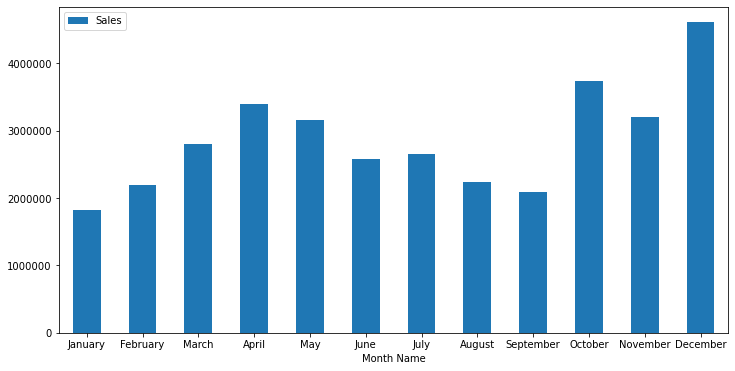

In [26]:
# this is one method of plotting bar charts in a python project
# an interactive method of plotting using plotly is shown in the next code block

x = monthly_sales.plot.bar(rot= 0, x='Month Name', y='Sales', figsize=(12,6))
x.ticklabel_format(axis='y', style='plain')
# plt.tight_layout()
plt.show()

In [27]:
# method 1: using df.iplot(), in this case the df is monthly_sales which we created
# we can hover over the bars to see the sales figure for each month

monthly_sales.iplot(kind='bar', x='Month Name', y='Sales')

In [28]:
import plotly.express as px

In [29]:
# method 2: an easier but more interactive method is done with plotly.express
# we will use px.bar(df, x='column1', y='column2'), in this case the df is again monthly_sales

px.bar(monthly_sales, x='Month Name', y='Sales', labels={'Month Name':'Month'}, template='presentation', opacity=0.5)

In [30]:
# purchase address is split in 3 parts to extract the zip code, city and state

df['Zip Code'] = df['Purchase Address'].apply(lambda x: x.split(' ')[-1])

In [31]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(', ')[1])

In [32]:
df['State'] = df['Purchase Address'].apply(lambda x: x.split(' ')[-2])

In [33]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Sales,Zip Code,City,State
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,August,23.98,98101,Seattle,WA
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,August,99.99,75001,Dallas,TX
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,August,700.00,97035,Portland,OR
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,August,7.68,90001,Los Angeles,CA
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,August,7.68,10001,New York City,NY


In [34]:
# in our dataset, we see the abbreviation for each state
# we can simple write a dictionary for each state with the abbreviation and full state name as key, value pairs

states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

In [35]:
%%timeit
df['State Name'] = df['State'].map(lambda x: states.get(x, x))

# .map is faster than .replace, we will create a new column for the full state name

# %%timeit will produce a usage error 'Line magic function `%%timeit` not found' if it's not the first thing in the cell
# so the even the comments have to go below it

32.6 ms ± 5.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [36]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Sales,Zip Code,City,State,State Name
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,December,14.95,94016,San Francisco,CA,California
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,December,7.68,90001,Los Angeles,CA,California
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,December,400.00,98101,Seattle,WA,Washington
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,December,11.99,75001,Dallas,TX,Texas
186849,319670,Bose SoundSport Headphones,1,99.99,2019-12-21 21:45:00,"747 Chestnut St, Los Angeles, CA 90001",12,December,99.99,90001,Los Angeles,CA,California


In [37]:
# %%timeit
# df['State'] = df['State'].replace(states)

In [38]:
len(df.columns)

13

In [39]:
# i used this method to re-arrange the columns but it is not required if the order is maintained while creating the new columns

# df.iloc[:,[0,1,2,3,4,5,6,7,8,-2,-3,-1]]

In [40]:
# creating a new variable for the citywide sales by summarizing the ordered quantity and sales
# the second line of code can be used if we want to sort the output by a specific column

city_sales = df.groupby('City')[['Quantity Ordered', 'Sales']].sum().reset_index()
# city_sales = df.groupby('City')[['Quantity Ordered', 'Sales']].sum().reset_index().sort_values(by='Sales')

In [41]:
city_sales

,City,Quantity Ordered,Sales
0,Atlanta,16584,2794199.07
1,Austin,11137,1818044.33
2,Boston,22494,3658627.65
3,Dallas,16707,2765373.96
4,Los Angeles,33247,5448304.28
5,New York City,27903,4661867.14
6,Portland,14037,2319331.94
7,San Francisco,50169,8254743.55
8,Seattle,16534,2745046.02


### Insight 2: 
#### San Francisco residents purchased the largest number of products amounting to the highest sales. 
#### Conversely, Austin had the fewest share of purchases and thus the lowest sales. 
#### Seattle, Atlanta and Dallas had a similar share of purchase quantity and sales.

In [42]:
# the below plot is based on the citywide sales data
# the second line of code is used to sort the bars based on the ascending order,
# because we chose not to order the output when saving the outcome in city_sales variable 

fig = px.bar(city_sales, x='City', y='Quantity Ordered', color='Sales', color_continuous_scale = 'Viridis')
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

In [43]:
# for each product, the total quantity ordered is summarized in this step

product_qnty = df.groupby('Product')[['Quantity Ordered']].sum().reset_index()

In [44]:
product_qnty

,Product,Quantity Ordered
0,20in Monitor,4126
1,27in 4K Gaming Monitor,6239
2,27in FHD Monitor,7541
3,34in Ultrawide Monitor,6192
4,AA Batteries (4-pack),27615
5,AAA Batteries (4-pack),30986
6,Apple Airpods Headphones,15637
7,Bose SoundSport Headphones,13430
8,Flatscreen TV,4813
9,Google Phone,5529


### Insight 3: 
#### The bubble chart below shows that AAA-batteries and AA-batteries were some of the most purchased products. Shoppers bought more than 25,000 units of each product over the year. 
#### Charging cables and wired headphones were sold relatively well between 20,000 and 24,000 units. 
#### At 15,000 mark, bluetooth headphones had a strong demand. LG washer and dryer had the least demand at around 600 units each.

In [45]:
# scatter plot for the products against the quantity sold

fig_pq = px.scatter(product_qnty, x='Product', y='Quantity Ordered', size='Quantity Ordered', 
           color='Quantity Ordered', color_continuous_scale='Portland', size_max=50)
fig_pq.update(layout_coloraxis_showscale=False)

In [46]:
# calculating the average price for each product

avg_price = df.groupby('Product')[['Price Each']].mean().reset_index()

In [47]:
avg_price

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


### Insight 4: 
#### A trendline of price across the bars helps us understand that purchases are price sensitive. Higher purchases are proportional to lower prices and vice versa.

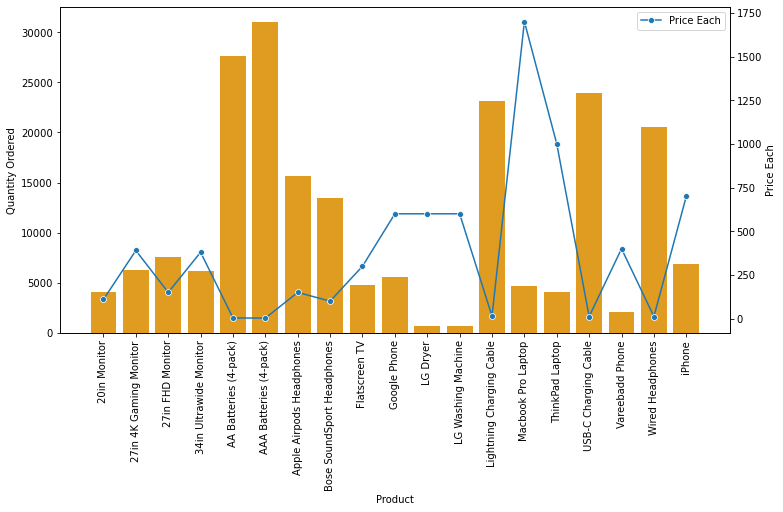

In [48]:
# plotting the quantity against the price each for every product

import seaborn as sns

fig1, ax1 = plt.subplots(figsize=(12,6))
sns.barplot(data = product_qnty, x='Product', y='Quantity Ordered', ax=ax1, color='Orange')
plt.xticks(rotation=90)

ax2 = ax1.twinx()
sns.lineplot(data = avg_price, x='Product', y='Price Each', ax=ax2, marker='o')
plt.legend(labels=['Price Each'])

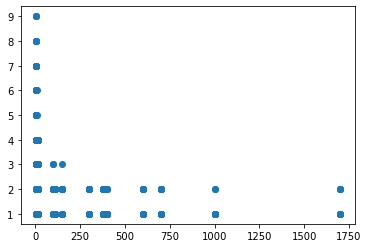

In [49]:
# plotting the scatter plot of the original dataframe to check if any clusters are being formed

plt.scatter(df['Price Each'], df['Quantity Ordered'])

In [50]:
# extracting hour and minute from the order date column

df['Hour'] = df['Order Date'].dt.hour

In [51]:
df['Minute'] = df['Order Date'].dt.minute

In [52]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Sales,Zip Code,City,State,State Name,Hour,Minute
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,August,23.98,98101,Seattle,WA,Washington,22,21
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,August,99.99,75001,Dallas,TX,Texas,15,11
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,August,700.00,97035,Portland,OR,Oregon,14,40
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,August,7.68,90001,Los Angeles,CA,California,20,59
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,August,7.68,10001,New York City,NY,New York,19,53


In [53]:
hourly_orders = df.groupby('Hour')[['Order ID']].count().reset_index()

In [54]:
hourly_orders

,Hour,Order ID
0,0,3902
1,1,2347
2,2,1242
3,3,830
4,4,852
5,5,1320
6,6,2481
7,7,4002
8,8,6252
9,9,8740


### Insight 5: 
#### From the extracted hour and minute columns, it is easier to determine shopper's preferences when it comes to the time of the day they prefer to shop. The chart below indicates that most of the purchases were made between 10am to 9pm. 
#### Running advertising campaigns between these hours would benefit the company in achieving more sales since it is more likely that the maximum number of customers would notice the campaigns.

In [55]:
fig2 = px.line(hourly_orders, x='Hour', y='Order ID', height=600, width=800)
fig2.update_xaxes(tickmode='linear')